In [ ]:
# 6.7  使用scikit-learn提供的梯度提升處理迴歸問題(GradientBoostingRegressor)

In [1]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np
diabetes = load_diabetes()
train_size = 400
train_x, train_y = diabetes.data[:train_size], diabetes.target[:train_size]
test_x, test_y = diabetes.data[train_size:], diabetes.target[train_size:]
np.random.seed(123456)

# --- 第 2 部分 ---
# 初始化模型
ensemble_size = 50
learning_rate = 0.1
ensemble = GradientBoostingRegressor(n_estimators=ensemble_size,  # 弱學習器的數量
                                     learning_rate=learning_rate) # 決定學習率

# --- 第 3 部分 ---
# 訓練模型
ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

# --- 第 4 部分 ---
# 評估模型
r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

# --- 第 5 部分 ---
# 顯示結果
print('Gradient Boosting:')
print('R-squared: %.2f' % r2)
print('MSE: %.2f' % mse)


Gradient Boosting:
R-squared: 0.59
MSE: 2255.59


In [2]:
ensemble.train_score_

array([5413.20569558, 4949.56567472, 4544.50737531, 4222.30141651,
       3946.92729013, 3706.33096668, 3513.88104872, 3336.84392169,
       3186.96465367, 3056.58400798, 2937.06494248, 2833.08262041,
       2743.88559498, 2665.33481793, 2602.79535352, 2533.46864258,
       2476.96709917, 2399.82789906, 2344.62974963, 2299.70462223,
       2243.92875318, 2209.34972005, 2177.48857895, 2128.85956299,
       2097.97296772, 2063.70342621, 2021.55296686, 1988.40247962,
       1962.00117438, 1928.88308345, 1911.85285773, 1884.14764841,
       1870.36255859, 1844.98980468, 1830.15718053, 1820.59349548,
       1807.15924555, 1777.04787208, 1753.06400492, 1738.38597946,
       1727.59300702, 1714.40646274, 1703.9177987 , 1685.18020097,
       1675.42200086, 1665.74976634, 1647.05108419, 1636.78281532,
       1616.70660533, 1610.26047653])

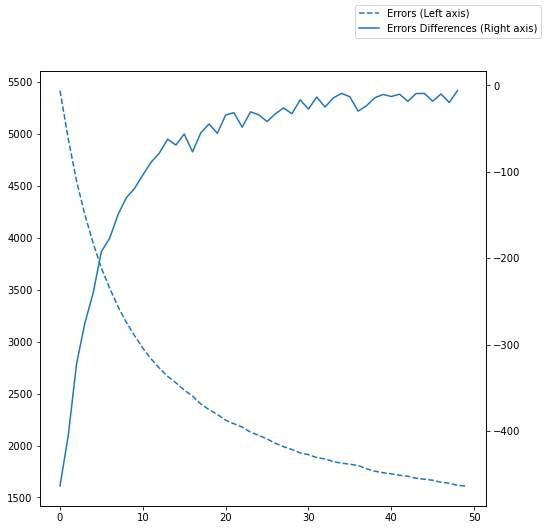

In [3]:
import matplotlib.pyplot as plt
diffs = [ensemble.train_score_[i] - ensemble.train_score_[i-1] for i in range(1, len(ensemble.train_score_))]

fig, ax1 = plt.subplots(figsize = (8, 8))
ax1.plot(ensemble.train_score_, linestyle='--', label='Errors (Left axis)')


ax2 = ax1.twinx()
ax2.plot(diffs, label='Errors Differences (Right axis)')
fig.legend()